In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [126]:
wine_data = pd.read_csv('wine.csv')

In [127]:
wine_data.head()

,Unnamed: 0,Cultivars,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [128]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    178 non-null    int64  
 1   Cultivars                     178 non-null    int64  
 2   Alcohol                       178 non-null    float64
 3   Malic acid                    178 non-null    float64
 4   Ash                           178 non-null    float64
 5   Alcalinity of ash             178 non-null    float64
 6   Magnesium                     178 non-null    int64  
 7   Total Phenols                 178 non-null    float64
 8   Flavanoids                    178 non-null    float64
 9   Nonflavanoid phenols          178 non-null    float64
 10  Proanthocyanins               178 non-null    float64
 11  Color intensity               178 non-null    float64
 12  Hue                           178 non-null    float64
 13  OD280

In [129]:
wine_data['Cultivars'].value_counts()

1    71
0    59
2    48
Name: Cultivars, dtype: int64

In [130]:
wine_data.describe()

,Unnamed: 0,Cultivars,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,88.500000,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,51.528309,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,44.250000,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,88.500000,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,132.750000,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,177.000000,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [131]:
wine_data= wine_data.loc[:, ~wine_data.columns.str.contains('^Unnamed')]


independent_variable = wine_data.drop('Cultivars',axis=1)
target_variable = wine_data['Cultivars']
len(target_variable)




178

In [132]:
independent_variable

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [133]:
data = independent_variable.iloc[:, 2:5].values

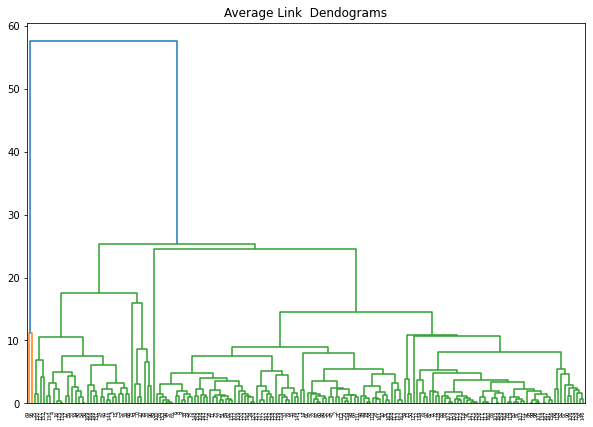

In [134]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Average Link  Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='average'))
plt.savefig("average.png")

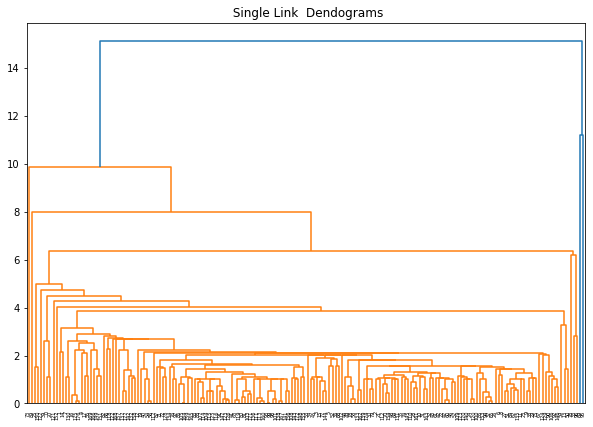

In [135]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title(" Single Link  Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='single'))
plt.savefig("Single.png")

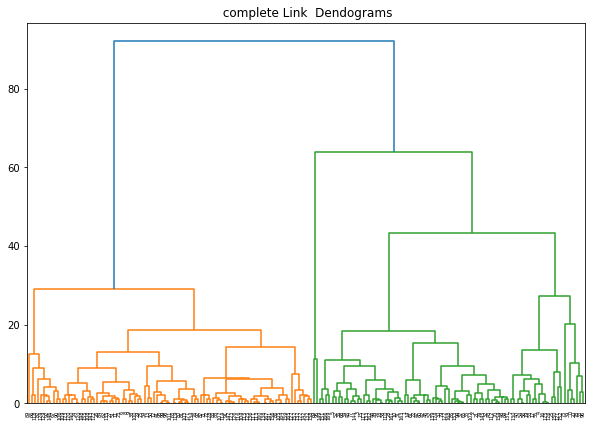

In [136]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title(" complete Link  Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='complete'))
plt.savefig("complete.png")